***Статья для хабр: чеклист для базового data preparation***

Часто люди, заходящие в область Data Science, имеют не совсем реалистичные представления о том, что их ждет. Многие думают, что сейчас они будут круто писать нейросети, создавать голосового помощника из Железного Человека или обыгрывать всех на финансовых рынках.

Но на самом деле работа Data Scienist завязана на данных, и один из важнейших и времязатратных моментов - это обработка данных перед тем, как их подавать в нейросеть или анализировать определенным способом.

В этой статье наша команда опишет то, как можно легко и быстро обработать данные с помощью пошаговой инструкцией и кодом. Мы старались сделать так, чтобы код был довольно гибким и его можно было применять для разных датасетов.

Многие профессионалы возможно и не найдут ничего нового в этой статье, но новечки смогут подчерпнуть что-то новое, а также каждый, кто давно мечтал сделать себе отдельный notebook для быстрой и структурированной обработки данных может скопировать код и отформатировать его под себя, или скачать готовый notebook по ссылке с Github. 

***Получили dataset. Что делать?***

Итак, стандарт: нужно понять, с чем имеем дело, общую картину. Для этого используем pandas, чтобы просто определить разные типы данных.

In [1]:
import pandas as pd #импортируем pandas
import numpy as np  #импортируем numpy
df = pd.read_csv("AB_NYC_2019.csv") #читаем датасет и записываем в переменную df

In [2]:
df.head(3) #смотрим на первые 3 строчки, чтобы понять, как выглядят значения

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [3]:
df.info() #Демонстрируем информацию о колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Для более глубокого взгляда на значения в каждой колонке, можем воспользоваться функцией pandas describe(). Правда, недостаток этой функции в том, что она не дает информацию про колонки со значениями string (или object). С ними мы разберемся позже.

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Смотрим на значения колонок:
    1) Соответсвует ли количество строчек каждой колонки общему количеству строчек?
    2) Какова суть данных в каждой колонке? 
    3) Какую колонку мы хотим сделать target, чтобы делать предсказания для нее?
    
 Ответы на эти вопросы позволят проанализировать датасет, и примерно нарисовать план ближайших действий.

✨***Волшебная визуализация***✨

Посморим на то, где у нас отсутствуют значения вообще

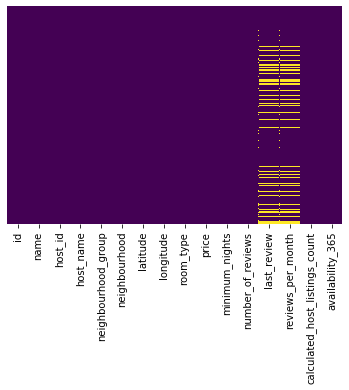

In [25]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Видим, что в основном пустые значения находятся в колонках "last_review" и "reviews_per_month". Также можно посмотреть на места, где могут быть пропущенны данные с помощью функции .info(), расмотренной выше.

***Это был небольшой взгляд сверху, сейчас же мы приступим к более интересным вещам***

Попробуем найти и по возможности удалить колонки, в которых есть всего одно значение во всех строчках (они на результат влиять никак не будут).

In [15]:
df = df[[c for c
        in list(df)
        if len(df[c].unique()) > 1]] #Перезаписываем датасет, вписывая только те колонки,
                                     #в которых больше одного уникального значения

Теперь предохраняем себя и успех нашего проекта от строк-дубликатов (строк, которые содержат одну и ту же информацию в одном и том же порядке, что и уже одна из существующих строчек).

In [ ]:
df.drop_duplicates(inplace=True) #Делаем это, если считаем нужным.
                                 #В некоторых проектах удалять такие данные не стоит.

***Разделяем датасет на два: один с качественными значениями, а другой - с количественными***

In [21]:
df_numerical = df.select_dtypes(include = [np.number])
df_categorical = df.select_dtypes(exclude = [np.number])

Мы делаем это, чтобы нам было легче обрабатывать эти два разных типа данных - в последствии мы поймем, насколько это упрощает нам жизнь.

***Работаем с количественными данными***

Первое, что нам стоит сделать - определить, нет ли "колонок - шпионов" в количественных данных. Мы называем эти колонки так, потому что они выдают себя за количественные данные, а сами работают как качественные. Как нам их определить? Конечно, зависит от данных, которые Вы анализируете, но в основном такие колонки могут иметь мало уникальных данных (в районе 3-10 уникальных значений).

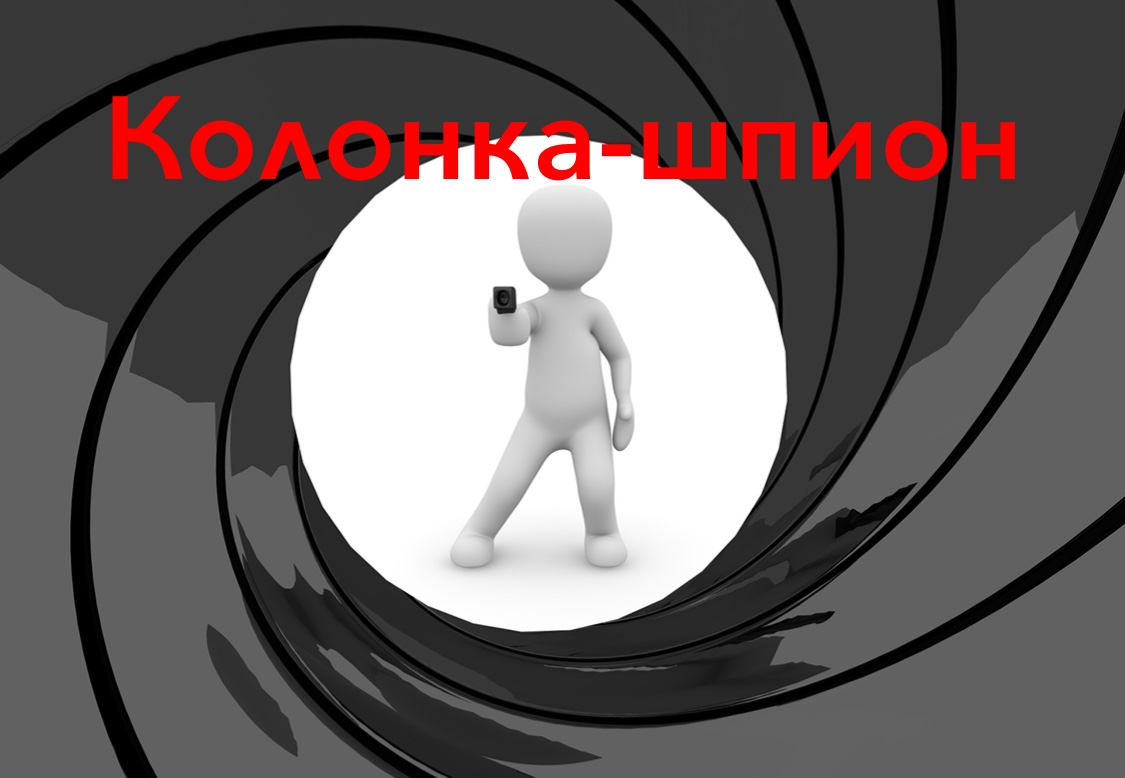

In [9]:
print(df_numerical.nunique())

id                                48895
host_id                           37457
latitude                          19048
longitude                         14718
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [ ]:
spy_columns = df_numerical[['колонка1', 'колока2', 'колонка3']]#выделяем колонки-шпионы и записываем в отдельную dataframe
df_numerical.drop(labels=['колонка1', 'колока2', 'колонка3'], axis=1, inplace = True)#вырезаем эти колонки из количественных данных
df_categorical.insert(1, 'колонка1', spy_columns['колонка1']) #добавляем первую колонку-шпион в качественные данные
df_categorical.insert(1, 'колонка2', spy_columns['колонка2']) #добавляем вторую колонку-шпион в качественные данные
df_categorical.insert(1, 'колонка3', spy_columns['колонка3']) #добавляем третью колонку-шпион в качественные данные

После того, как мы полностью отделили количественные данные, можно с ними как следует поработать. Первое - следует понять, где у нас есть пустые значения (NaN или 0). 

In [23]:
df_numerical.describe().min()

id                                2539.00000
host_id                           2438.00000
latitude                             0.05453
longitude                          -74.24442
price                                0.00000
minimum_nights                       1.00000
number_of_reviews                    0.00000
reviews_per_month                    0.01000
calculated_host_listings_count       1.00000
availability_365                     0.00000
dtype: float64

На этом этапе важно понять, в каких колонках нули могут означать отсутствующие значения: связано ли это с тем, как собирались данные? Или это может быть связано со значениями данных? На эти вопросы нужно отвечать в каждом отдельном случае.

Итак, если мы все-таки решили, что данные у нас могут отсутствовать там, где есть нули, ***следует заменить нули на NaN***, чтобы было легче потом работать с этими утерянными данными:

In [ ]:
df_numerical[["колонка 1", "колонка 2"]] = df_numerical[["колонка 1", "колонка 2"]].replace(0, nan)

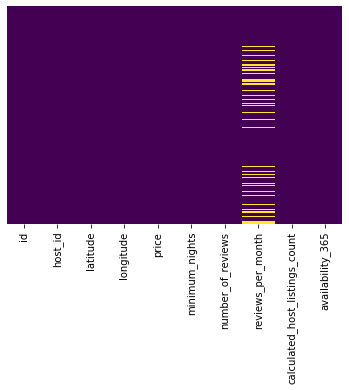

In [26]:
sns.heatmap(df_numerical.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Можно также воспользоваться df_numerical.info()

Здесь долждны быть отмечены желтым цветом те значения внутри столбцов, которые отсутствуют. И самое иинтересное начинается теперь - как вести себя с этими значениями? Удалить строчки с этими значениями или столбцы? Или заполнить эти пустые значения какими-нибудь другими? Вот небольшая схема, которая может Вам помочь определиться с тем, что можно в принципе сделать с пустыми значениями:

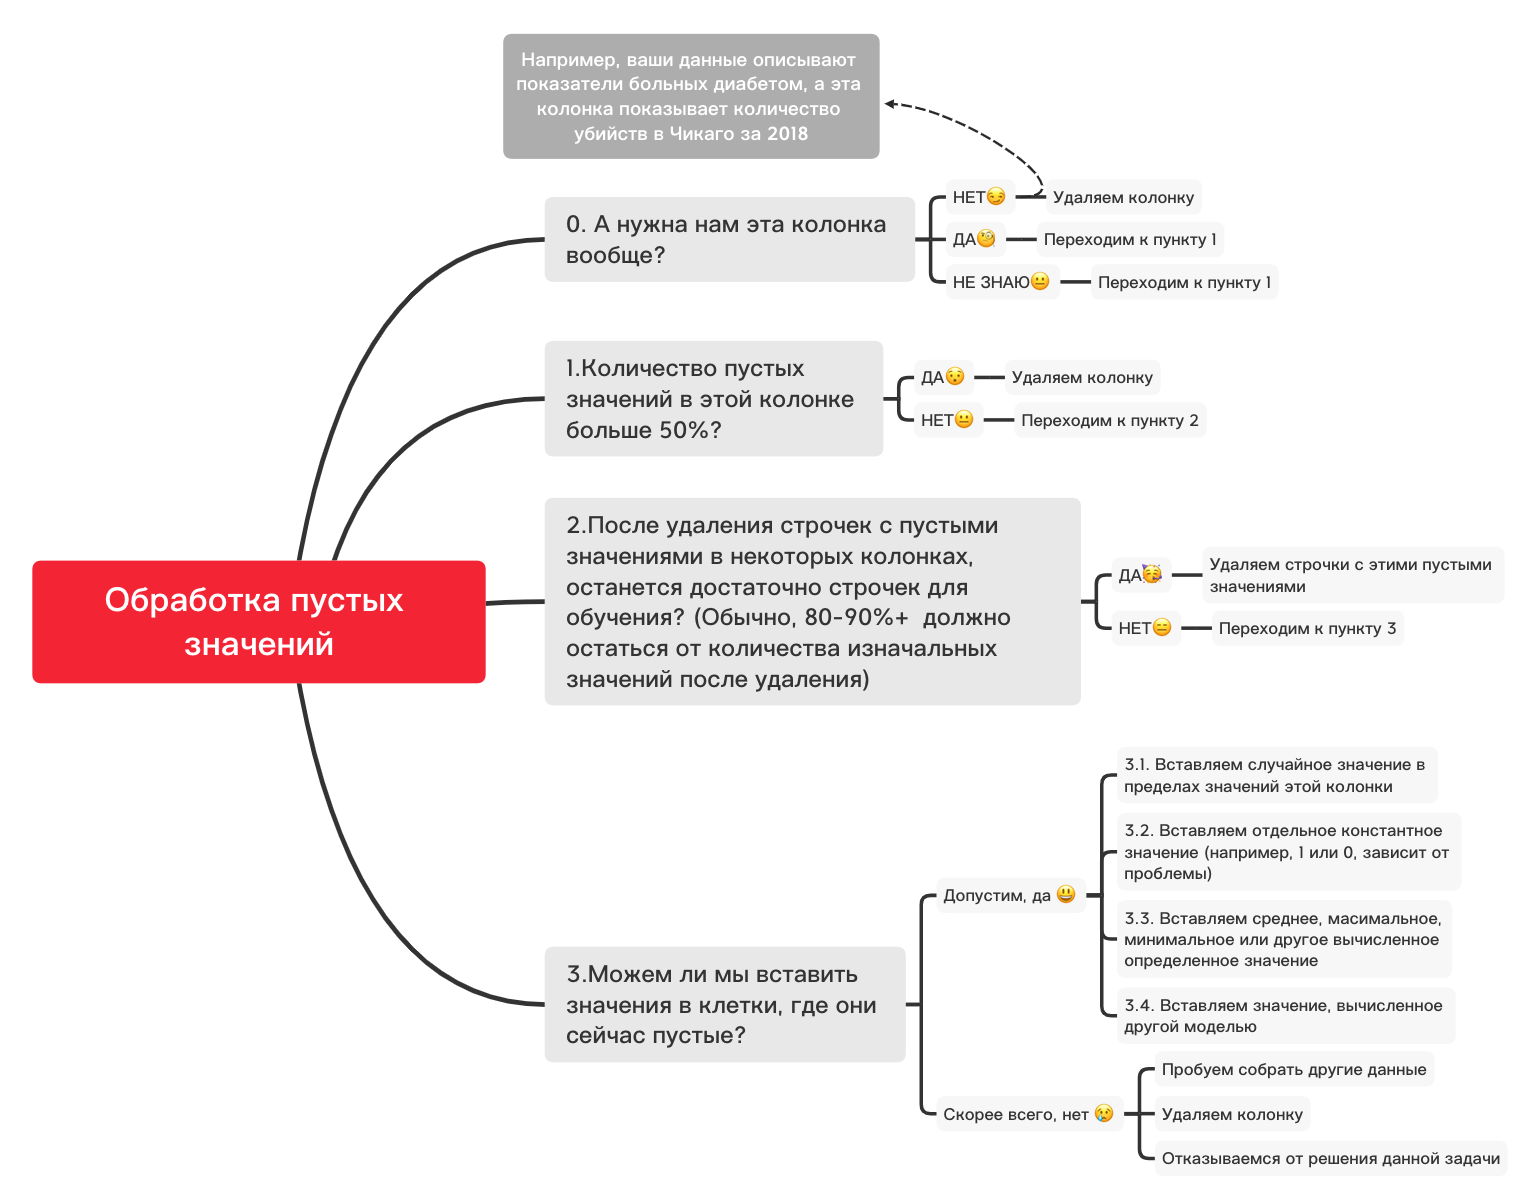

***0.Удаляем ненужные колонки***

In [ ]:
df_numerical.drop(labels=["колонка1","колонка2"], axis=1, inplace=True)

***1.Количество пустых значений в этой колонке больше 50%?***

In [31]:
print(df_numerical.isnull().sum() / df_numerical.shape[0] * 100)

id                                 0.000000
host_id                            0.000000
latitude                           0.000000
longitude                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [ ]:
df_numerical.drop(labels=["колонка1","колонка2"], axis=1, inplace=True)#Удаляем, если какая-то колонка имеет больше 50 пустых значений

***2.Удаляем строчки с пустыми значениями***

In [ ]:
df_numerical.dropna(inplace=True)#Удаляем строчки с пустыми значениями, если потом останется достаточно данных для обучения

***3.1.Вставляем случайное значение***

In [ ]:
import random #импортируем random
df_numerical["колонка"].fillna(lambda x: random.choice(df[df[column] != np.nan]["колонка"]), inplace=True) #вставляем рандомные значения в пустые клетки таблицы

***3.2. Вставляем константное значение***

In [ ]:
from sklearn.impute import SimpleImputer #импортируем SimpleImputer, который поможет вставить значения
imputer = SimpleImputer(strategy='constant', fill_value="<Ваше значение здесь>") #вставляем определенное значение с помощью SimpleImputer
df_numerical[["новая_колонка1",'новая_колонка2','новая_колонка3']] = imputer.fit_transform(df_numerical[['колонка1', 'колонка2', 'колонка3']]) #Применяем это для нашей таблицы
df_numerical.drop(labels = ["колонка1","колонка2","колонка3"], axis = 1, inplace = True) #Убираем колонки со старыми значениями

***3.3. Вставляем среднее или макисмально частое значение***

In [ ]:
from sklearn.impute import SimpleImputer #импортируем SimpleImputer, который поможет вставить значения
imputer = SimpleImputer(strategy='mean', missing_values = np.nan) #вместо mean можно также использовать most_frequent
df_numerical[["новая_колонка1",'новая_колонка2','новая_колонка3']] = imputer.fit_transform(df_numerical[['колонка1', 'колонка2', 'колонка3']]) #Применяем это для нашей таблицы
df_numerical.drop(labels = ["колонка1","колонка2","колонка3"], axis = 1, inplace = True) #Убираем колонки со старыми значениями

***3.4. Вставляем значение, вычисленное другой моделью***

Порой значения можно вычислить с помощью регрессионных моделей, используя модели из библиоткеи sklearn или других похожих библиотек. В этой статье мы не будем рассматривать этот пример, поскольку это могло бы занять довольно много времени. Возможно, наша команда посвятит отдельную статью по тому, как это можно сделать в ближайшем будущем. 

Итак, пока повествование о количественных данных прервется, потому что есть множество других нюансов о том, как лучше делать data preparation и preprocessing для разных задач, и базовые вещи для количественных данных были учтены в этой статье, и сейчас самое время вернуться в качественным данным, которые мы отделили несколько шагов назад от количественных.

***Качественные данные***

В основном для качественных данных используется метод One-hot-encoding, для того, чтобы отформатировать их из string (или object) в число. Перед тем как перейти к этому пункту, воспользуемся схемой и кодом сверху, для того, чтобы разобраться с пустыми значениями.

In [33]:
df_categorical.nunique()

name                   47905
host_name              11452
neighbourhood_group        5
neighbourhood            221
room_type                  3
last_review             1764
dtype: int64

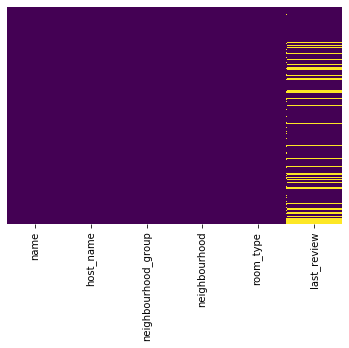

In [35]:
sns.heatmap(df_categorical.isnull(),yticklabels=False,cbar=False,cmap='viridis')

***0.Удаляем ненужные колонки***

In [ ]:
df_categorical.drop(labels=["колонка1","колонка2"], axis=1, inplace=True)

***1.Количество пустых значений в этой колонке больше 50%?***

In [36]:
print(df_categorical.isnull().sum() / df_numerical.shape[0] * 100)

name                    0.032723
host_name               0.042949
neighbourhood_group     0.000000
neighbourhood           0.000000
room_type               0.000000
last_review            20.558339
dtype: float64


In [ ]:
df_categorical.drop(labels=["колонка1","колонка2"], axis=1, inplace=True) #Удаляем, если какая-то колонка 
                                                                          #имеет больше 50% пустых значений

***2.Удаляем строчки с пустыми значениями***

In [ ]:
df_categorical.dropna(inplace=True)#Удаляем строчки с пустыми значениями, 
                                   #если потом останется достаточно данных для обучения

***3.1.Вставляем случайное значение***

In [ ]:
import random
df_categorical["колонка"].fillna(lambda x: random.choice(df[df[column] != np.nan]["колонка"]), inplace=True)

***3.2. Вставляем константное значение***

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value="<Ваше значение здесь>")
df_categorical[["новая_колонка1",'новая_колонка2','новая_колонка3']] = imputer.fit_transform(df_categorical[['колонка1', 'колонка2', 'колонка3']])
df_categorical.drop(labels = ["колонка1","колонка2","колонка3"], axis = 1, inplace = True)

Итак, наконец мы разобрались с пустыми значениями в качественнных данных. 
Теперь время произвести one-hot-encoding для значений, которые есть в вашей базе данных:

In [ ]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [ ]:
features_to_encode = ["колонка1","колонка2","колонка3"]
for feature in features_to_encode:
    df_categorical = encode_and_bind(df_categorical, feature)

***Итак, наконец мы закончили обрабатывать отдельно качественные и количественные данные - время совмещать датасеты***

In [ ]:
new_df = pd.concat([df_numerical,df_categorical], axis=1)

После того, как мы соединили вместе датасеты в один, под конец мы можем использовать трансформацию данных с помощью MinMaxScaler из библиотки sklearn. Это сделает наши значения в пределах от 0 до 1, что поможет при обучении модели в будущем.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
new_df = min_max_scaler.fit_transform(new_df)

В этой статье мы не учли работу с данными относящимся к временным рядам, так как для таких данных следует использовать немного иные техники их обработки, в зависимости от Вашей задачи. В будущем наша команда посвятит этой теме отдельную статью, и мы надеемся, что она сможет принести в Вашу жизнь что-то интересное, новое и полезное.